In [15]:
#import basic libraries
import pandas as pd
import numpy as np
import sys
#import libraries needed for the model and data preprocessing
import sklearn.metrics as sk_metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


from sklearn.preprocessing import MinMaxScaler
#import visualisation libraries
import matplotlib.pyplot as plt
#get the models from the wrapper.py file in the nam folder. 
sys.path.append('../')
import nam.wrapper as nam_models

In [16]:
#get the data. The data is separated by semicolons
RedWineData = pd.read_csv('../../../Data/Wine/winequality-red.csv', delimiter = ';')
WhiteWineData = pd.read_csv('../../../Data/Wine/winequality-white.csv', delimiter = ';')
#Combine the two files into one Winedata variable 
WineFrames = [RedWineData, WhiteWineData]
WineData = pd.concat(WineFrames)
print(WineData.shape)

(6497, 12)


In [17]:
#Set target and training variables
target = WineData['quality']
x_wine = WineData.drop(['quality'], axis=1)

In [18]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(x_wine, target, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.15 / (0.15 + 10.7)))

In [19]:
#Scale the data
scaler = MinMaxScaler((-1, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#create and fit the model
nam_reg = nam_models.NAMRegressor(
                lr=0.01,
                output_reg=0.001,
                metric='RMSE',
                num_learners=10
            )
nam_reg.fit(X_train, y_train) 

In [21]:
#evaluate the model
wine_pred = nam_reg.predict(X_test)
score = sk_metrics.mean_squared_error(y_test, wine_pred, squared=False)
print("RMSE score is: ", score)

RMSE score is:  0.7720179481742024


In [22]:
score_metric = ['neg_root_mean_squared_error']
r = permutation_importance(nam_reg, X_test, y_test,n_repeats = 20, scoring = score_metric, random_state=55)

In [24]:
print(sorted(r['neg_root_mean_squared_error']['importances_mean']))

[0.001630225659856016, 0.0027381184530841764, 0.00361064986328965, 0.004524562665255921, 0.004894468092054421, 0.004997121835650003, 0.005617247978073508, 0.008251376429795088, 0.013869213947520526, 0.046229054653233445, 0.1398583697739177]


In [23]:
r['neg_root_mean_squared_error']['importances_mean']

array([0.00163023, 0.04622905, 0.00452456, 0.00561725, 0.00273812,
       0.00825138, 0.00489447, 0.00499712, 0.00361065, 0.01386921,
       0.13985837])

11


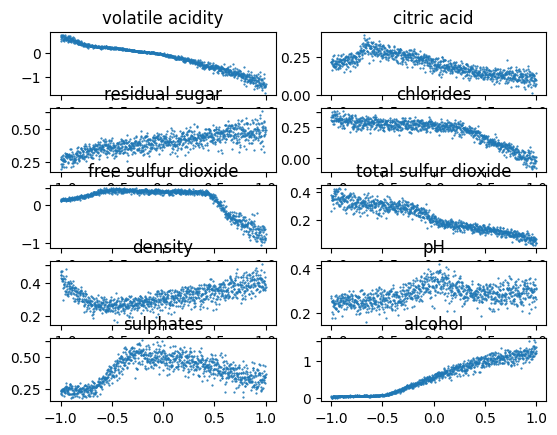

In [45]:
figure, axis = plt.subplots(5, 2)
counter = 1
for i in range(5):
    for j in range(2):
        column_of_data = X_train[:, counter]
        vis_data = nam_reg.plot(counter, column_of_data)
        axis[i, j].scatter(vis_data['x'], vis_data['y'], s=0.3)
        axis[i, j].set_title(x_wine.columns[counter])
        counter += 1


In [25]:
alcohol_column = X_train[:, 10]
alcohol_data = nam_reg.plot(10, alcohol_column)

volatile_acidity_col = X_train[:, 1]
vol_acid_data = nam_reg.plot(1, volatile_acidity_col)

free_sulfur_col = X_train[:, 5]
free_sulfur_data = nam_reg.plot(5, free_sulfur_col)

%store alcohol_data
%store vol_acid_data
%store free_sulfur_data

Stored 'alcohol_data' (dict)
Stored 'vol_acid_data' (dict)
Stored 'free_sulfur_data' (dict)


In [1]:
print(alcohol_data.shape)

NameError: name 'alcohol_data' is not defined

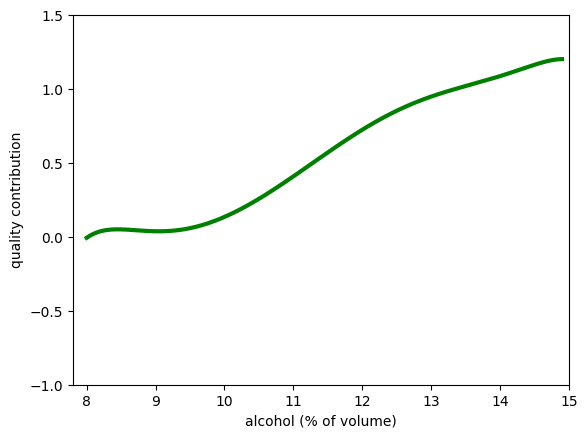

In [107]:
alcohol_x = np.linspace(x_wine['alcohol'].min(), x_wine['alcohol'].max(), len(alcohol_data['y']))
linefit = np.poly1d(np.polyfit(alcohol_data['x'], alcohol_data['y'], 8))
#plt.plot(alcohol_x, alcohol_data['y'])
plt.plot(alcohol_x, linefit(alcohol_data['x']), color = 'green', linewidth = 3)
plt.xlim(7.8, 15)
plt.ylim(-1, 1.5)
plt.xlabel('alcohol (% of volume)')
plt.ylabel('quality contribution')
plt.show()

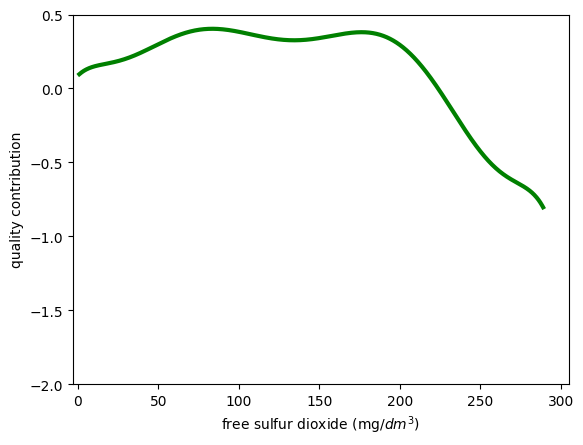

In [100]:
sulfur_x = np.linspace(x_wine['free sulfur dioxide'].min(), x_wine['free sulfur dioxide'].max(), len(free_sulfur_data['y']))
linefit = np.poly1d(np.polyfit(free_sulfur_data['x'], free_sulfur_data['y'], 8))
#plt.plot(sulfur_x, free_sulfur_data['y'])
plt.plot(sulfur_x, linefit(free_sulfur_data['x']), color = 'green', linewidth = 3)
plt.xlim(-3, 305)
plt.ylim(-2, 0.5)
plt.xlabel('free sulfur dioxide (mg/$dm^3$)')
plt.ylabel('quality contribution')
plt.show()


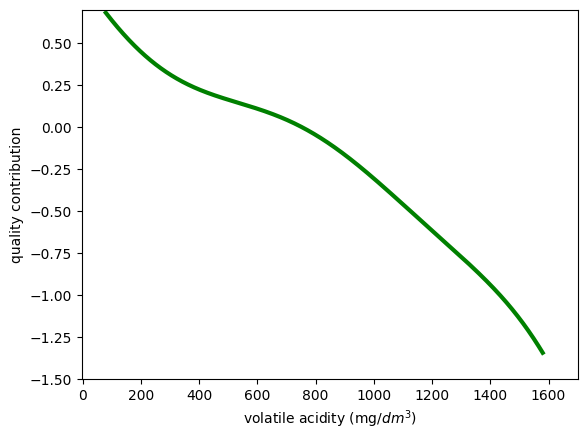

In [111]:
acid_x = np.linspace((x_wine['volatile acidity'].min() * 1000), (x_wine['volatile acidity'].max() * 1000), len(vol_acid_data['y']))
linefit = np.poly1d(np.polyfit(vol_acid_data['x'], vol_acid_data['y'], 8))
#plt.plot(acid_x, vol_acid_data['y'])
plt.plot(acid_x, linefit(vol_acid_data['x']), color = 'green', linewidth = 3)
plt.xlim(-3, 1700)
plt.ylim(-1.5, 0.7)
plt.xlabel('volatile acidity (mg/$dm^3$)')
plt.ylabel('quality contribution')
plt.show()
